In [4]:
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('users.csv')
df.sample(n=10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9329,9330,15572073,Yao,663,Spain,Male,35,5,0.00,2,1,1,62634.94,0
5447,5448,15795124,Pan,726,Germany,Male,50,9,94504.35,1,0,1,5078.90,0
9321,9322,15686099,Ruse,563,Spain,Male,61,1,82182.10,1,1,0,106826.92,1
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
7772,7773,15614168,Alexander,792,Germany,Female,50,4,146710.76,1,1,0,16528.40,1
9783,9784,15680430,Ajuluchukwu,601,Germany,Female,49,4,96252.98,2,1,0,104263.82,0
7303,7304,15568469,Buckley,653,France,Male,43,0,0.00,2,1,0,27862.58,0
8988,8989,15812279,William,634,France,Male,37,5,115345.86,2,0,0,168781.80,0
2851,2852,15776454,Hamilton,603,France,Female,48,5,0.00,1,1,0,100478.60,1
1374,1375,15774738,Campa,632,France,Male,44,3,107764.75,1,1,0,185667.72,0


##### Стандартный синтаксис создания графика

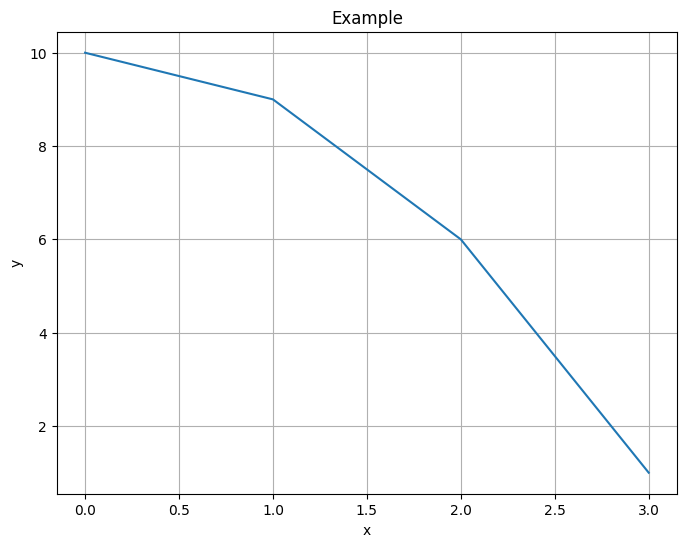

In [10]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1, 2, 3], [10, 9, 6, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example')
plt.grid();

#### Виды графиков

##### Линейный график

In [12]:
data = df.groupby('Geography')['Age'].agg(count='count').reset_index().sort_values(by='Geography')
data.head()

,Geography,count
0,France,5014
1,Germany,2509
2,Spain,2477


##### Matplotlib

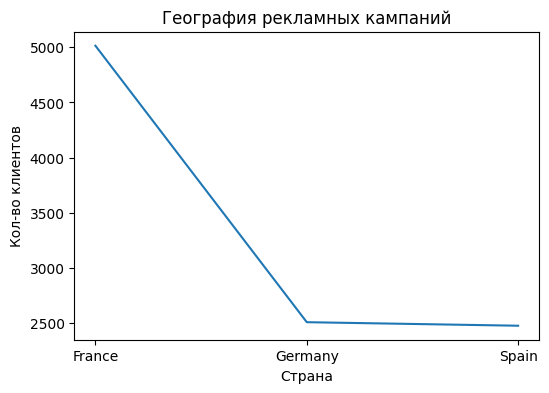

In [14]:
plt.figure(figsize=(6, 4))

plt.plot(data['Geography'], data['count'])

plt.title('География рекламных кампаний')
plt.xlabel('Страна')
plt.ylabel('Кол-во клиентов');

##### Seaborn

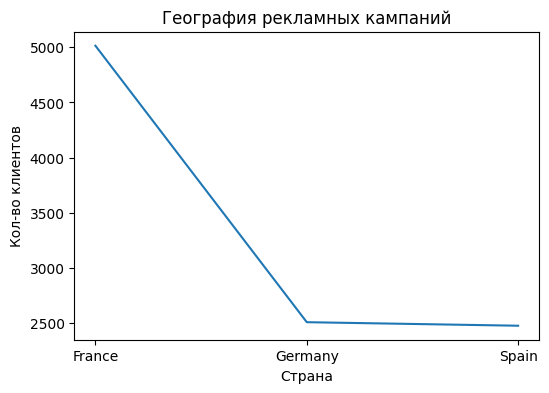

In [15]:
plt.figure(figsize=(6, 4))

sns.lineplot(x=data['Geography'], y=data['count'])

plt.title('География рекламных кампаний')
plt.xlabel('Страна')
plt.ylabel('Кол-во клиентов');

#### Гистограмма

##### Matplotlib

Text(0, 0.5, 'Кол-во клиентов')

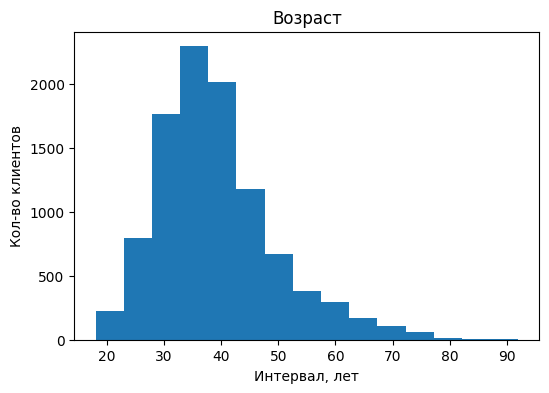

In [17]:
plt.figure(figsize=(6, 4))

plt.hist(df['Age'], bins=15)

plt.title('Возраст')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов')

##### Seaborn

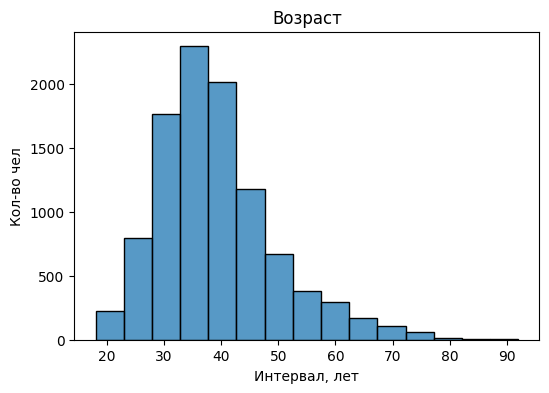

In [18]:
plt.figure(figsize=(6, 4))

sns.histplot(df['Age'], bins=15)

plt.title('Возраст')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во чел');

##### Диаграмма рассеяния

In [21]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('Age')['Balance'].sum().reset_index()
data.head()

,Age,Balance
0,18,1741730.65
1,19,1903568.57
2,20,3041555.60
3,21,4024124.79
4,22,5729954.90


##### Matplotlib

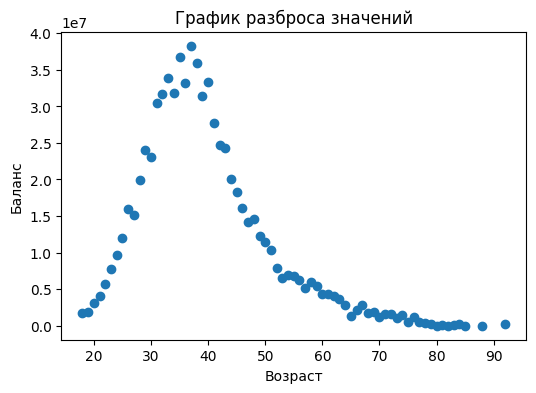

In [22]:
plt.figure(figsize=(6, 4))

plt.scatter(data['Age'], data['Balance'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Баланс');

##### Seaborn

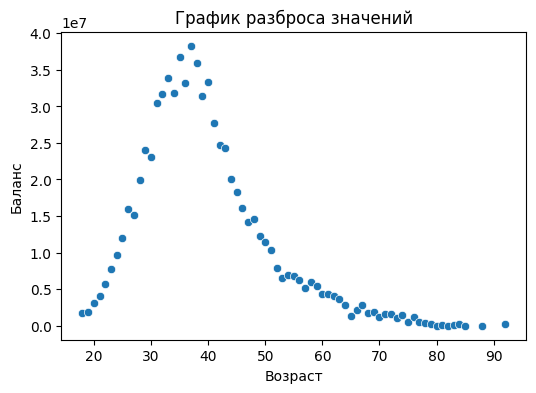

In [25]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x=data['Age'], y=data['Balance'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Баланс');

##### Столбчатые диаграммы

In [29]:
# Готовим данные для графика
data = df['Geography'].value_counts().reset_index()
data.head()

,Geography,count
0,France,5014
1,Germany,2509
2,Spain,2477


##### Matplotlib

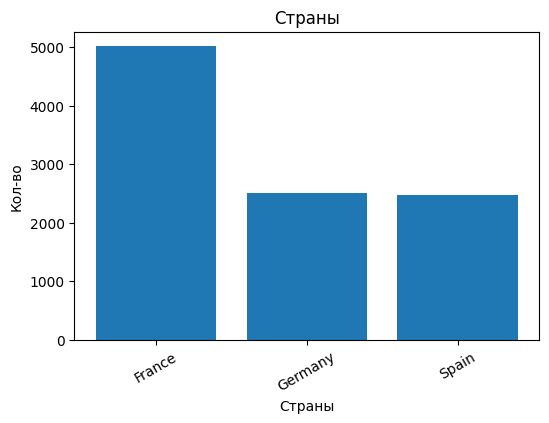

In [31]:
plt.figure(figsize=(6, 4))

plt.bar(data['Geography'], data['count'])

plt.title('Страны')
plt.xlabel('Страны')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

##### Seaborn

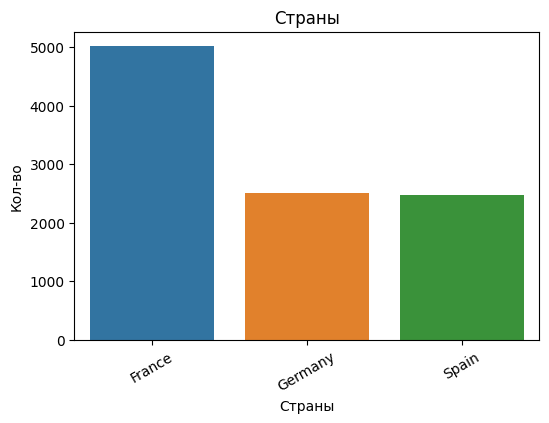

In [32]:
plt.figure(figsize=(6, 4))

sns.barplot(x=data['Geography'], y=data['count'])

plt.title('Страны')
plt.xlabel('Страны')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

##### Многорядовые столбчатые диаграммы

In [37]:
# Готовим данные для графика
data = pd.crosstab(df['Geography'], df['IsActiveMember']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

IsActiveMember,Geography,no,yes
0,France,2423,2591
1,Germany,1261,1248
2,Spain,1165,1312


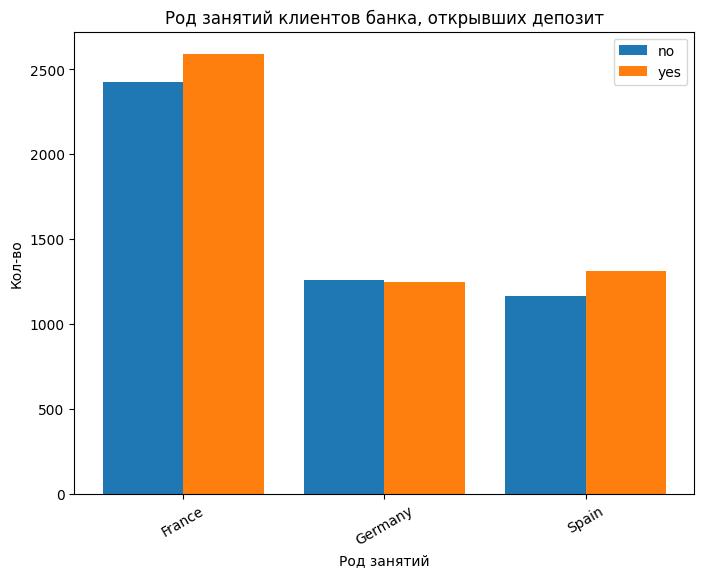

In [38]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['no']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Страна активных клиентов банка')
plt.xlabel('Страна')
plt.ylabel('Кол-во')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['Geography'], rotation = 30);  # добавляем метки делений

##### Сложенная столбчатая диаграмма

In [40]:
# Готовим данные для графика
data = pd.crosstab(df['Geography'], df['IsActiveMember'], normalize='index').reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

IsActiveMember,Geography,no,yes
1,Germany,0.502591,0.497409
0,France,0.483247,0.516753
2,Spain,0.470327,0.529673


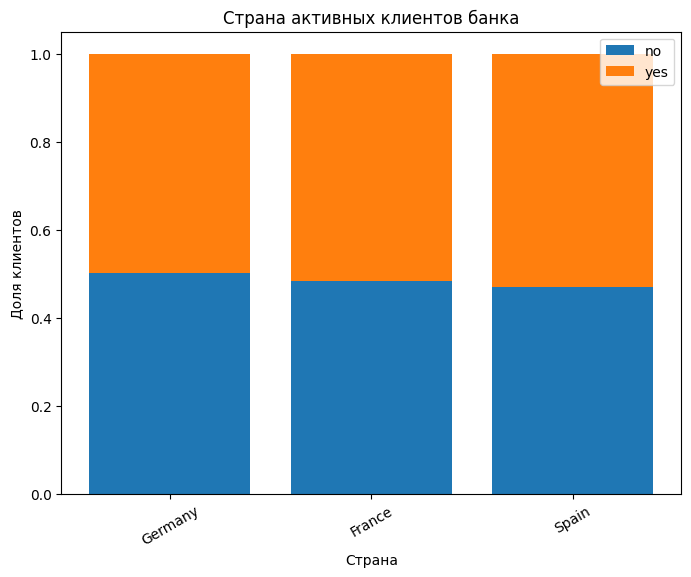

In [42]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure(figsize=(8, 6))

plt.bar(data['Geography'], data['no'])
plt.bar(data['Geography'], data['yes'], bottom=data['no'])

plt.title('Страна активных клиентов банка')
plt.xlabel('Страна')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30);

##### Ящики с усами

In [45]:
# Готовим данные для графика
data1 = df['Balance'][df['HasCrCard'] == 1]
data2 = df['Balance'][df['HasCrCard'] == 0]
data1.head()

0         0.00
2    159660.80
4    125510.82
5    113755.78
6         0.00
Name: Balance, dtype: float64

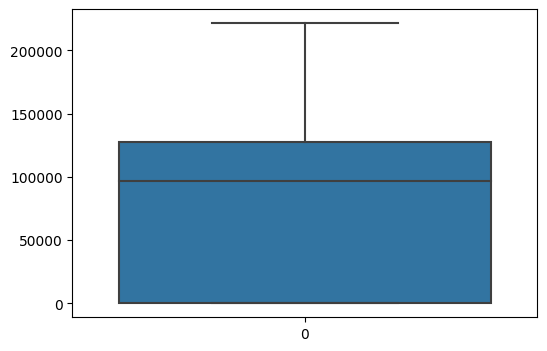

In [46]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1]);

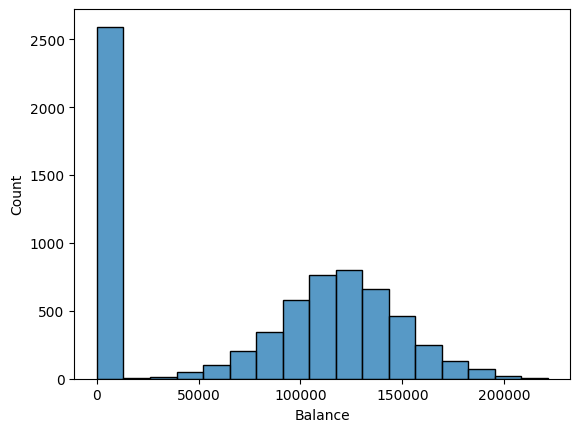

In [47]:
sns.histplot(x=data1);

##### Matplotlib

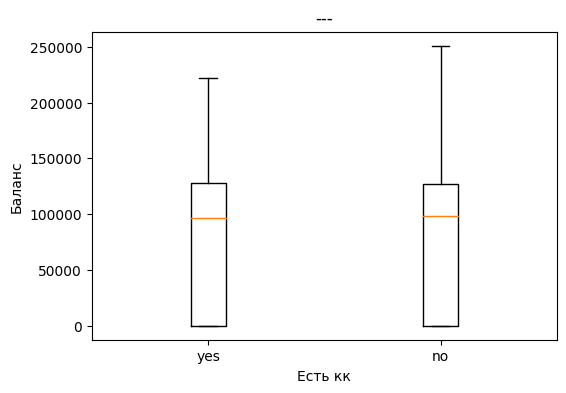

In [49]:
# Строим боксплот

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2])

plt.title('---')
plt.xlabel('Есть кк')
plt.ylabel('Баланс')
plt.xticks([1, 2], ['yes', 'no']);

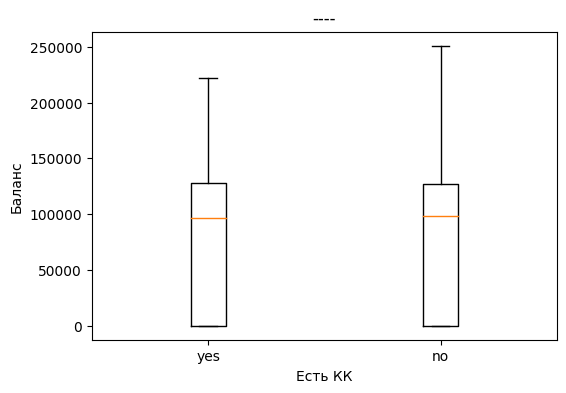

In [50]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2], showfliers=False)

plt.title('----')
plt.xlabel('Есть КК')

plt.ylabel('Баланс')
plt.xticks([1, 2], ['yes', 'no']);

##### Seaborn

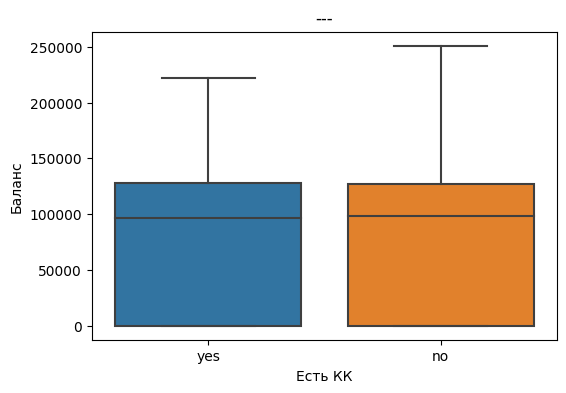

In [52]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1, data2], showfliers=False)

plt.title('---')
plt.xlabel('Есть КК')

plt.ylabel('Баланс')
plt.xticks([0, 1], ['yes', 'no']);

##### Круговая диаграмма

In [53]:
# Готовим данные для графика
data = df['HasCrCard'].value_counts()
data.index = ['no', 'yes']
data.head()

no     7055
yes    2945
Name: count, dtype: int64

##### Matplotlib

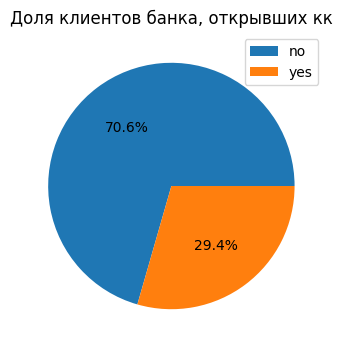

In [54]:
# Строим круговую диаграмму

plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших кк')
plt.legend(data.index);

##### Анализ взаимных распределений

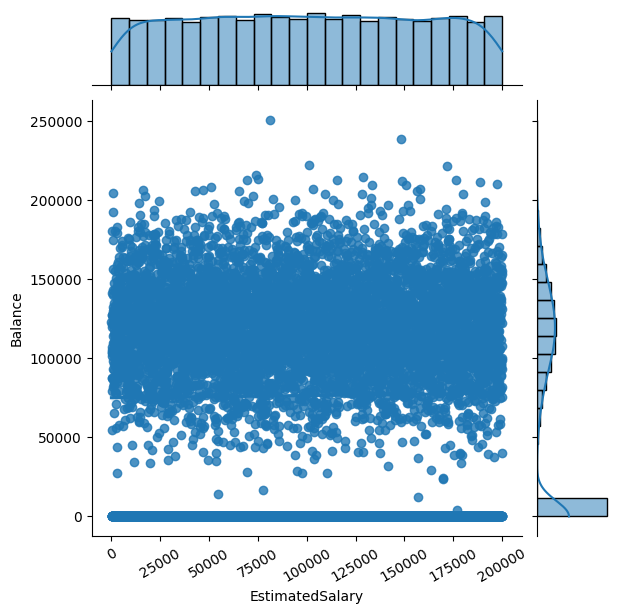

In [56]:
sns.jointplot(x=df['EstimatedSalary'], y=df['Balance'], kind='reg');
plt.xticks(rotation = 30);

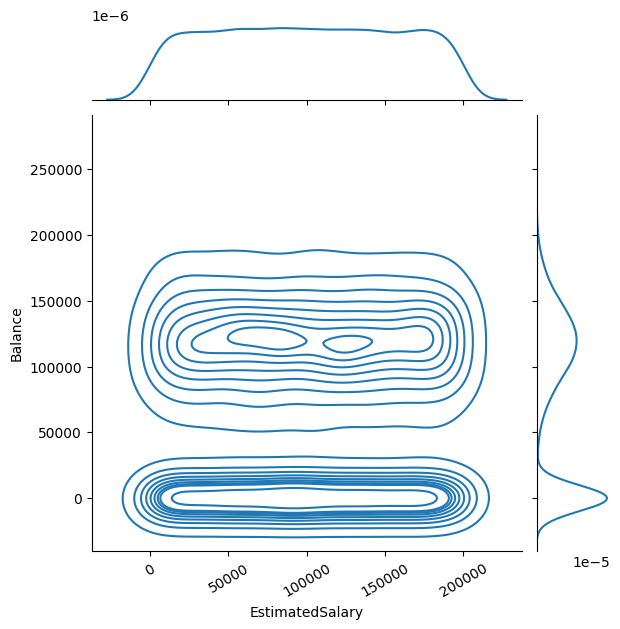

In [57]:
sns.jointplot(x=df['EstimatedSalary'], y=df['Balance'], kind='kde');
plt.xticks(rotation = 30);

### Матрица корреляций

In [61]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

ValueError: could not convert string to float: 'Hargrave'

In [ ]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

### Гео данные

In [ ]:
min_long = -124.55
max_long = -113.80

min_lat = 32.45
max_lat = 42.05

In [ ]:
import matplotlib.image as img
california_map = img.imread('California_Map.png')

plt.figure(figsize=(12, 9))
plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5);

In [ ]:
plt.figure(figsize=(12, 9))

sc = plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c=df['median_house_value'])

plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5)

plt.colorbar(sc)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography");

### Folium

In [ ]:
# !pip install folium

In [ ]:
import folium
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    folium.CircleMarker(
        location=[point.latitude, point.longitude],
        radius=2,
        popup=point.median_house_value
    ).add_to(this_map)
    
df.apply(plotDot, axis=1)

this_map.fit_bounds(this_map.get_bounds())

this_map

## Kepler**

In [62]:
# !conda install -c conda-forge keplergl
# !conda install -c conda-forge keplergl

In [ ]:
from keplergl import KeplerGl 

map_ = KeplerGl(height=700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name='./california.html')

### Summary
1. Матрица корреляции  
2. Знакомство с признаками  
- Плотность распределения (sns.distplot/sns.kdeplot/plt.hist - Узнать распределение признака)
- sns.violinplot - Узнать распределение признака
- Столбчатая диаграмма (sns.barplot/plt.bar - Узнать распределение категориального признака)
- Ящик с усами (sns.boxplot/plt.boxplot - Узнать диапазон значений)
- sns.jointplot - Взаимное изменение признаков
- plt.pie - Изобразить долю объектов от всего кол-ва
3. Поиск выбросов
- sns.distplot/sns.kdeplot/plt.hist - Искать хвосты слева и справа
- sns.boxplot - Всё, что выходит за пределы усов - выбросы

Seaborn - https://seaborn.pydata.org/examples/index.html
Matplotlib - https://matplotlib.org/3.1.0/gallery/index.html